Q-2. Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv("data\ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

There is no null value

In [3]:
for i in df:
    print(df[i].unique())

['Female' 'Male']
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
['yes' 'no']
['no' 'yes']
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199
 2.943749 2.33998  1.950742 2.277436 2.371338 2.984425 2.977018 2.663421
 2.753752 2.318355 2.594653 2.88

There is no unique value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


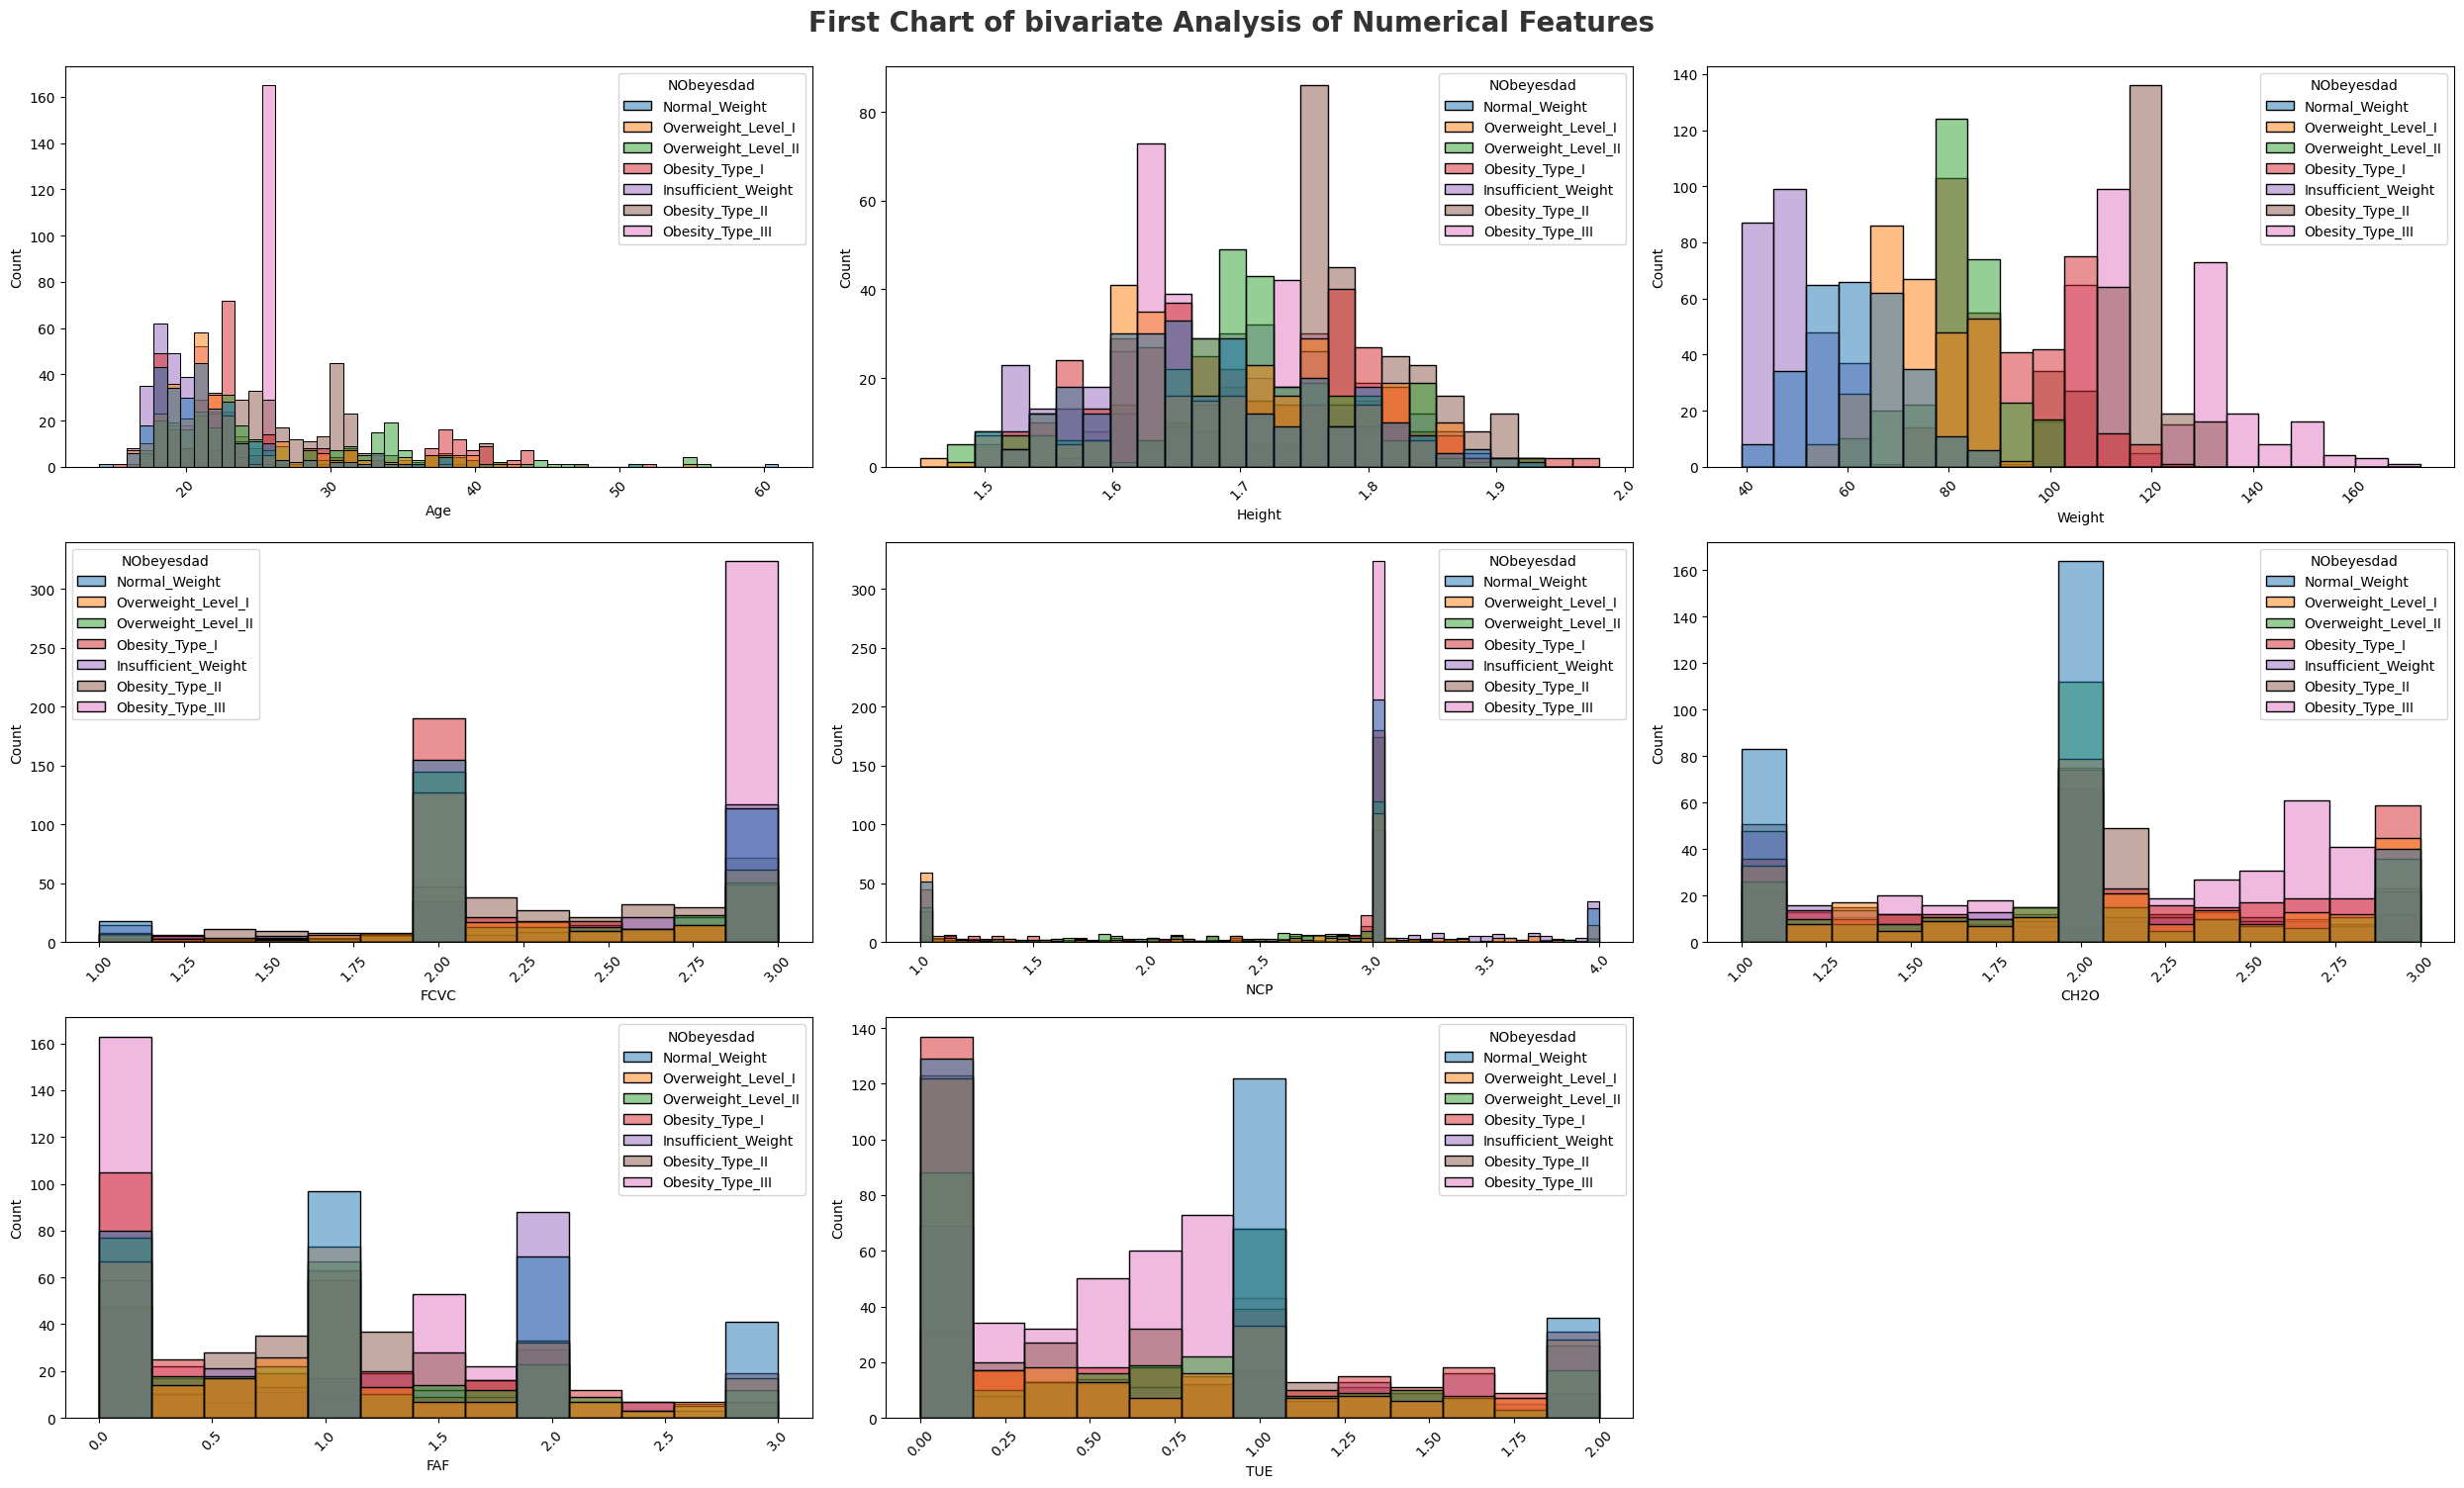

In [6]:
# plot for categorical columns
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(25, 15))
plt.suptitle('First Chart of bivariaae Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0, len(numerical_cols)):
    plt.subplot(3, 3, i+1)
    sns.histplot(data = df, x = df[numerical_cols[i]], hue='NObeyesdad')
    plt.xticks(rotation=45)
    plt.tight_layout()

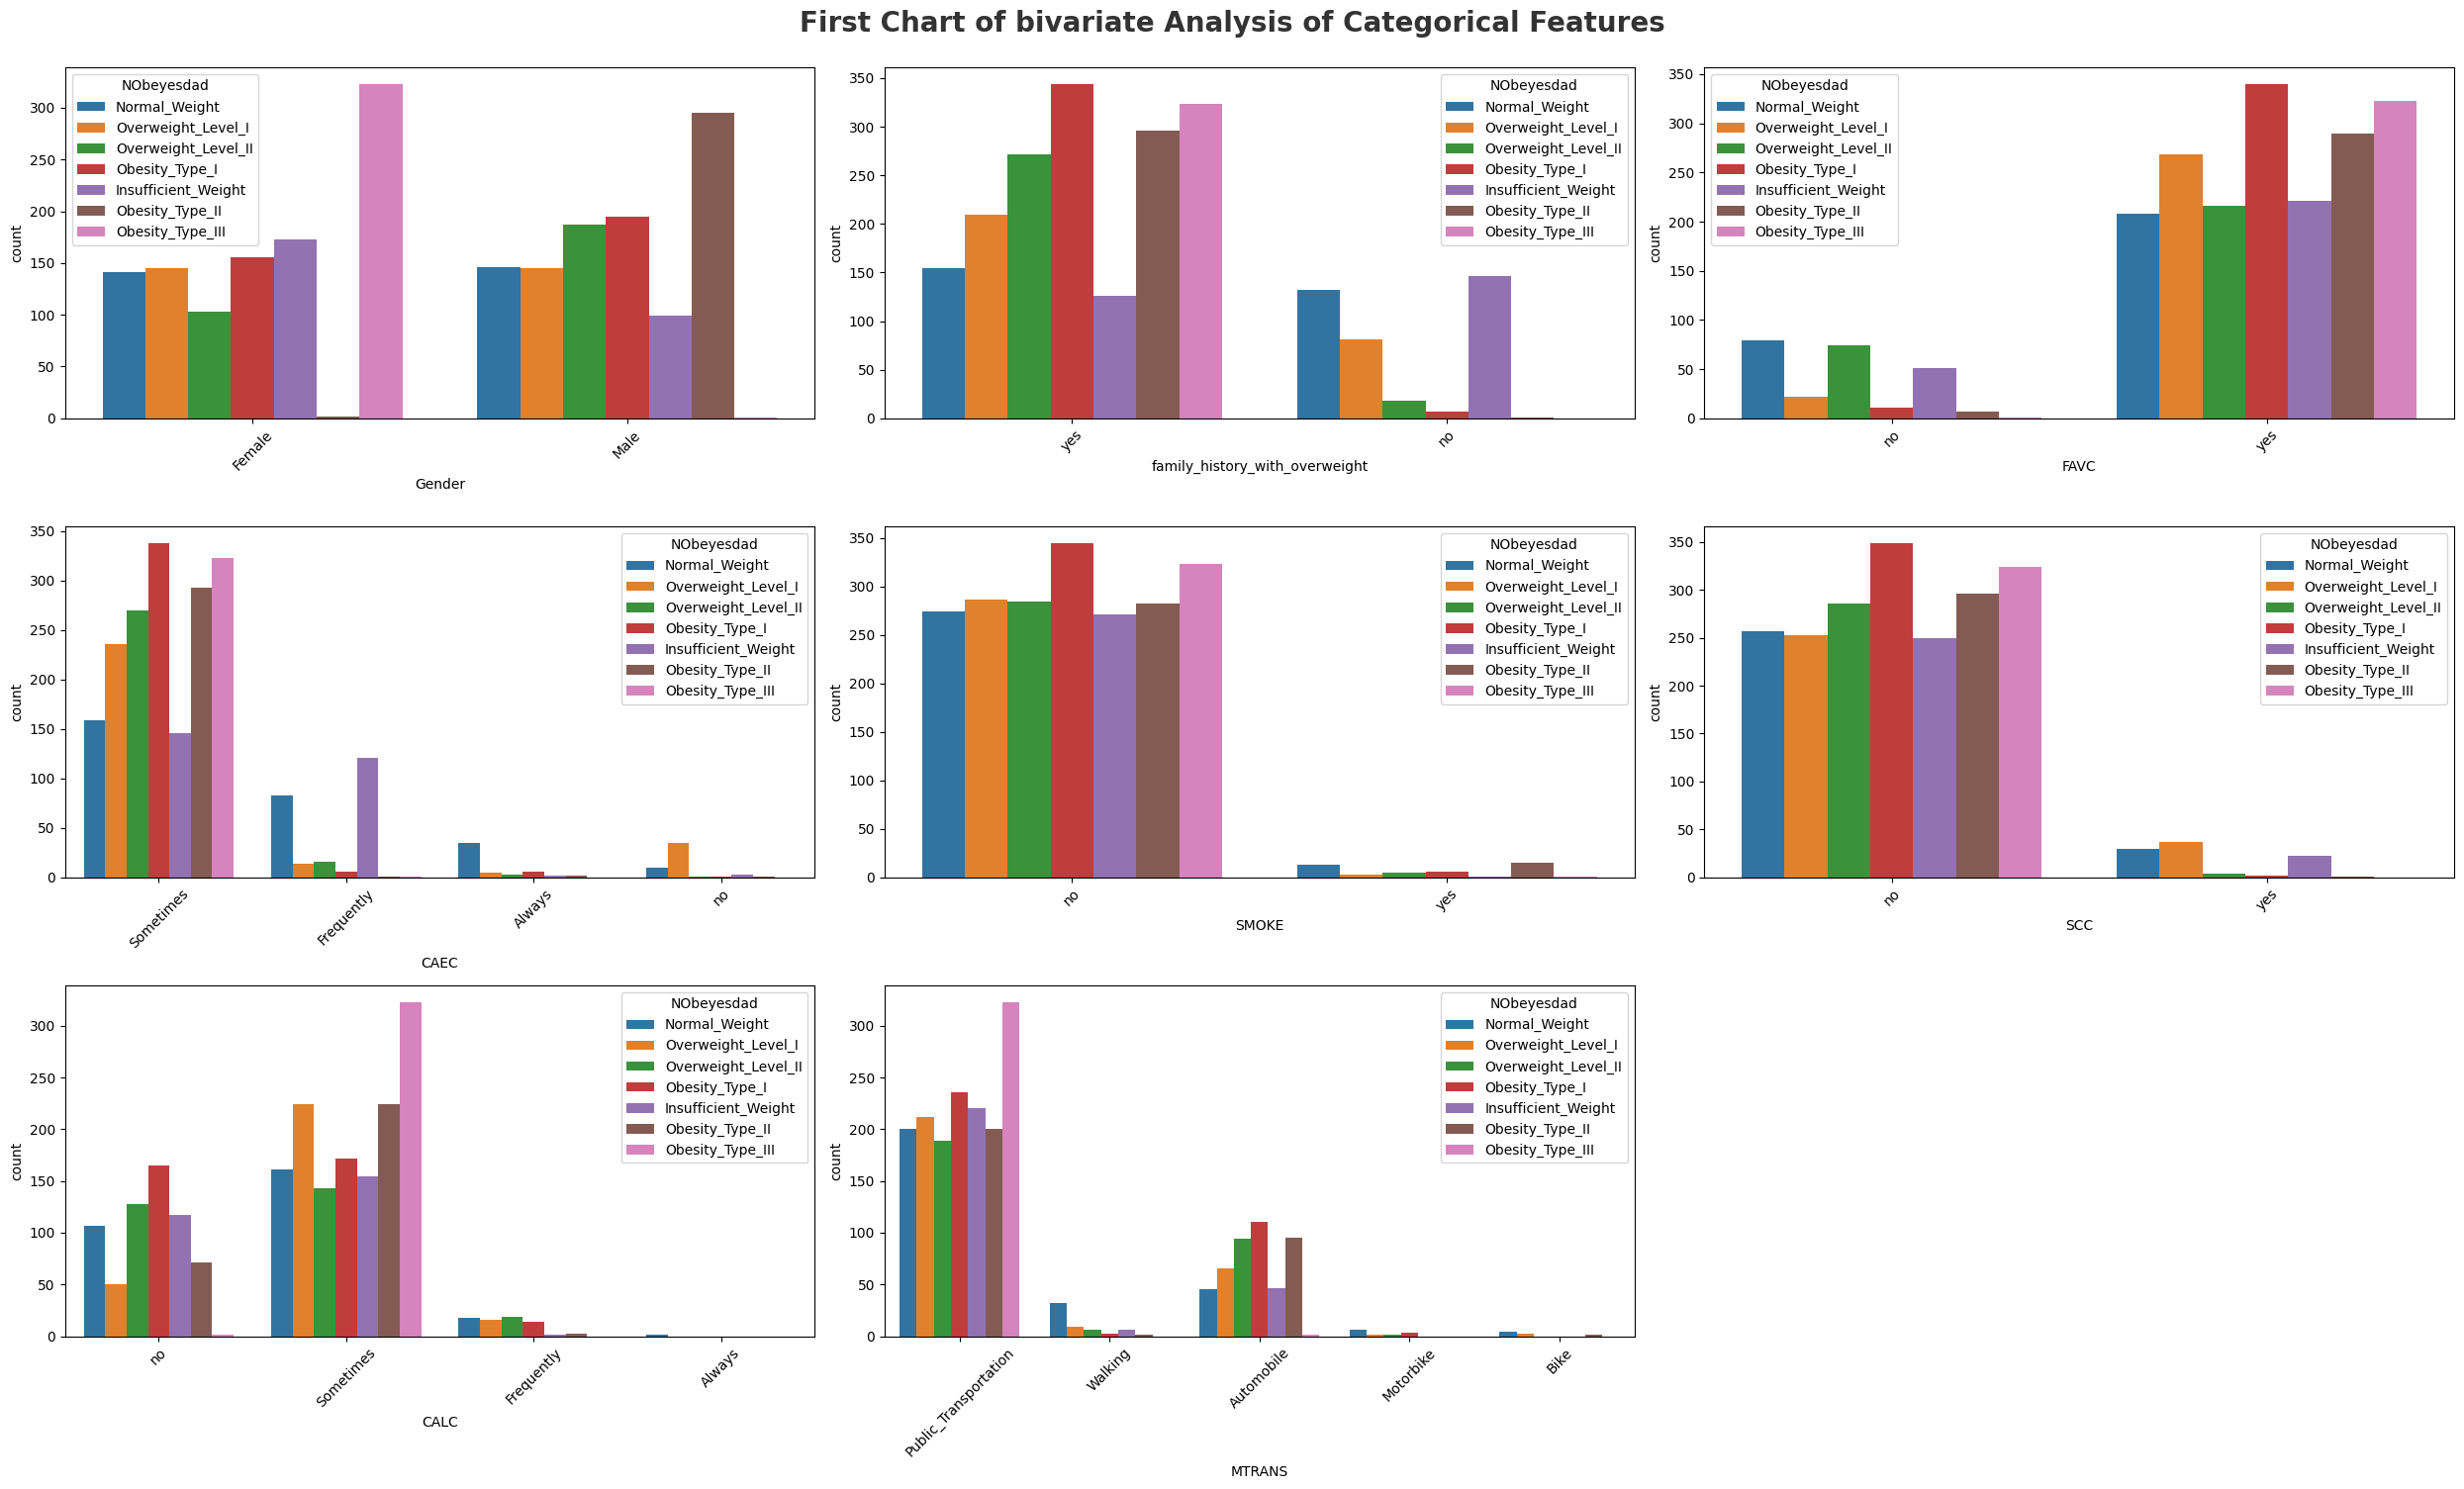

In [10]:
# plot for categorical columns
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(25, 15))
plt.suptitle('First Chart of bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0, len(categorical_cols)):
    plt.subplot(3, 3, i+1)
    sns.countplot(data = df, x = df[categorical_cols[i]], hue='NObeyesdad')
    plt.xticks(rotation=45)
    plt.tight_layout()

In [11]:
map = {'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Insufficient_Weight':5, 'Obesity_Type_II':6, 'Obesity_Type_III':7}
df['NObeyesdad'] = df['NObeyesdad'].replace(map)

In [12]:
## Independent and dependent feature
X = df.drop(labels=['NObeyesdad'],axis=1)
Y = df[['NObeyesdad']]

In [13]:
# Define which columns should be ordinal-encoded and which should be scale
categorical_cols = X.select_dtypes(include='object') .columns
numerical_cols = X.select_dtypes(exclude='object').columns
print("numerical_columns: ",numerical_cols)
print("categorical columns: ",categorical_cols)

numerical_columns:  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
categorical columns:  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [14]:
for i in categorical_cols:
    print(df[i].unique())

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [15]:
# Define the custom ranking for each ordinal variable
Gender = ['Female', 'Male']
family_history_with_overweight = ['yes', 'no']
FAVC = ['no', 'yes']
CAEC = ['Sometimes', 'Frequently', 'Always', 'no']
SMOKE = ['no', 'yes']
SCC = ['no', 'yes']
CALC = ['no', 'Sometimes', 'Frequently', 'Always']
MTRANS = ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']

In [16]:
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines A
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [17]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [18]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.40,random_state=123)
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
X_train.head()

,num_pipeline__Age,num_pipeline__Height,num_pipeline__Weight,num_pipeline__FCVC,num_pipeline__NCP,num_pipeline__CH2O,num_pipeline__FAF,num_pipeline__TUE,cat_pipeline__Gender,cat_pipeline__family_history_with_overweight,cat_pipeline__FAVC,cat_pipeline__CAEC,cat_pipeline__SMOKE,cat_pipeline__SCC,cat_pipeline__CALC,cat_pipeline__MTRANS
0,0.182865,-0.011566,-0.329321,0.458419,0.429492,1.605156,-0.535897,-0.029096,-1.032111,-0.478671,0.351193,-0.399109,-0.144802,-0.224994,0.493437,-0.541120
1,0.260840,-0.788585,0.700812,1.095751,0.429492,0.141574,-1.095873,-0.124585,-1.032111,-0.478671,0.351193,-0.399109,-0.144802,-0.224994,0.493437,-0.541120
2,2.163600,-2.124438,-1.022742,-0.787374,-2.089735,-0.011885,-1.178417,-1.089161,-1.032111,-0.478671,0.351193,2.768741,6.905962,-0.224994,0.493437,1.781109
3,-0.919669,-0.011566,-1.406781,-1.555345,1.103406,-1.489229,-0.457763,0.519965,-1.032111,2.089116,0.351193,-0.399109,-0.144802,-0.224994,0.493437,-0.541120
4,1.134338,0.068860,-0.155316,0.709873,0.744984,-1.034056,-1.151685,-1.089161,0.968888,-0.478671,0.351193,-0.399109,-0.144802,-0.224994,-1.411109,1.781109


<AxesSubplot: >

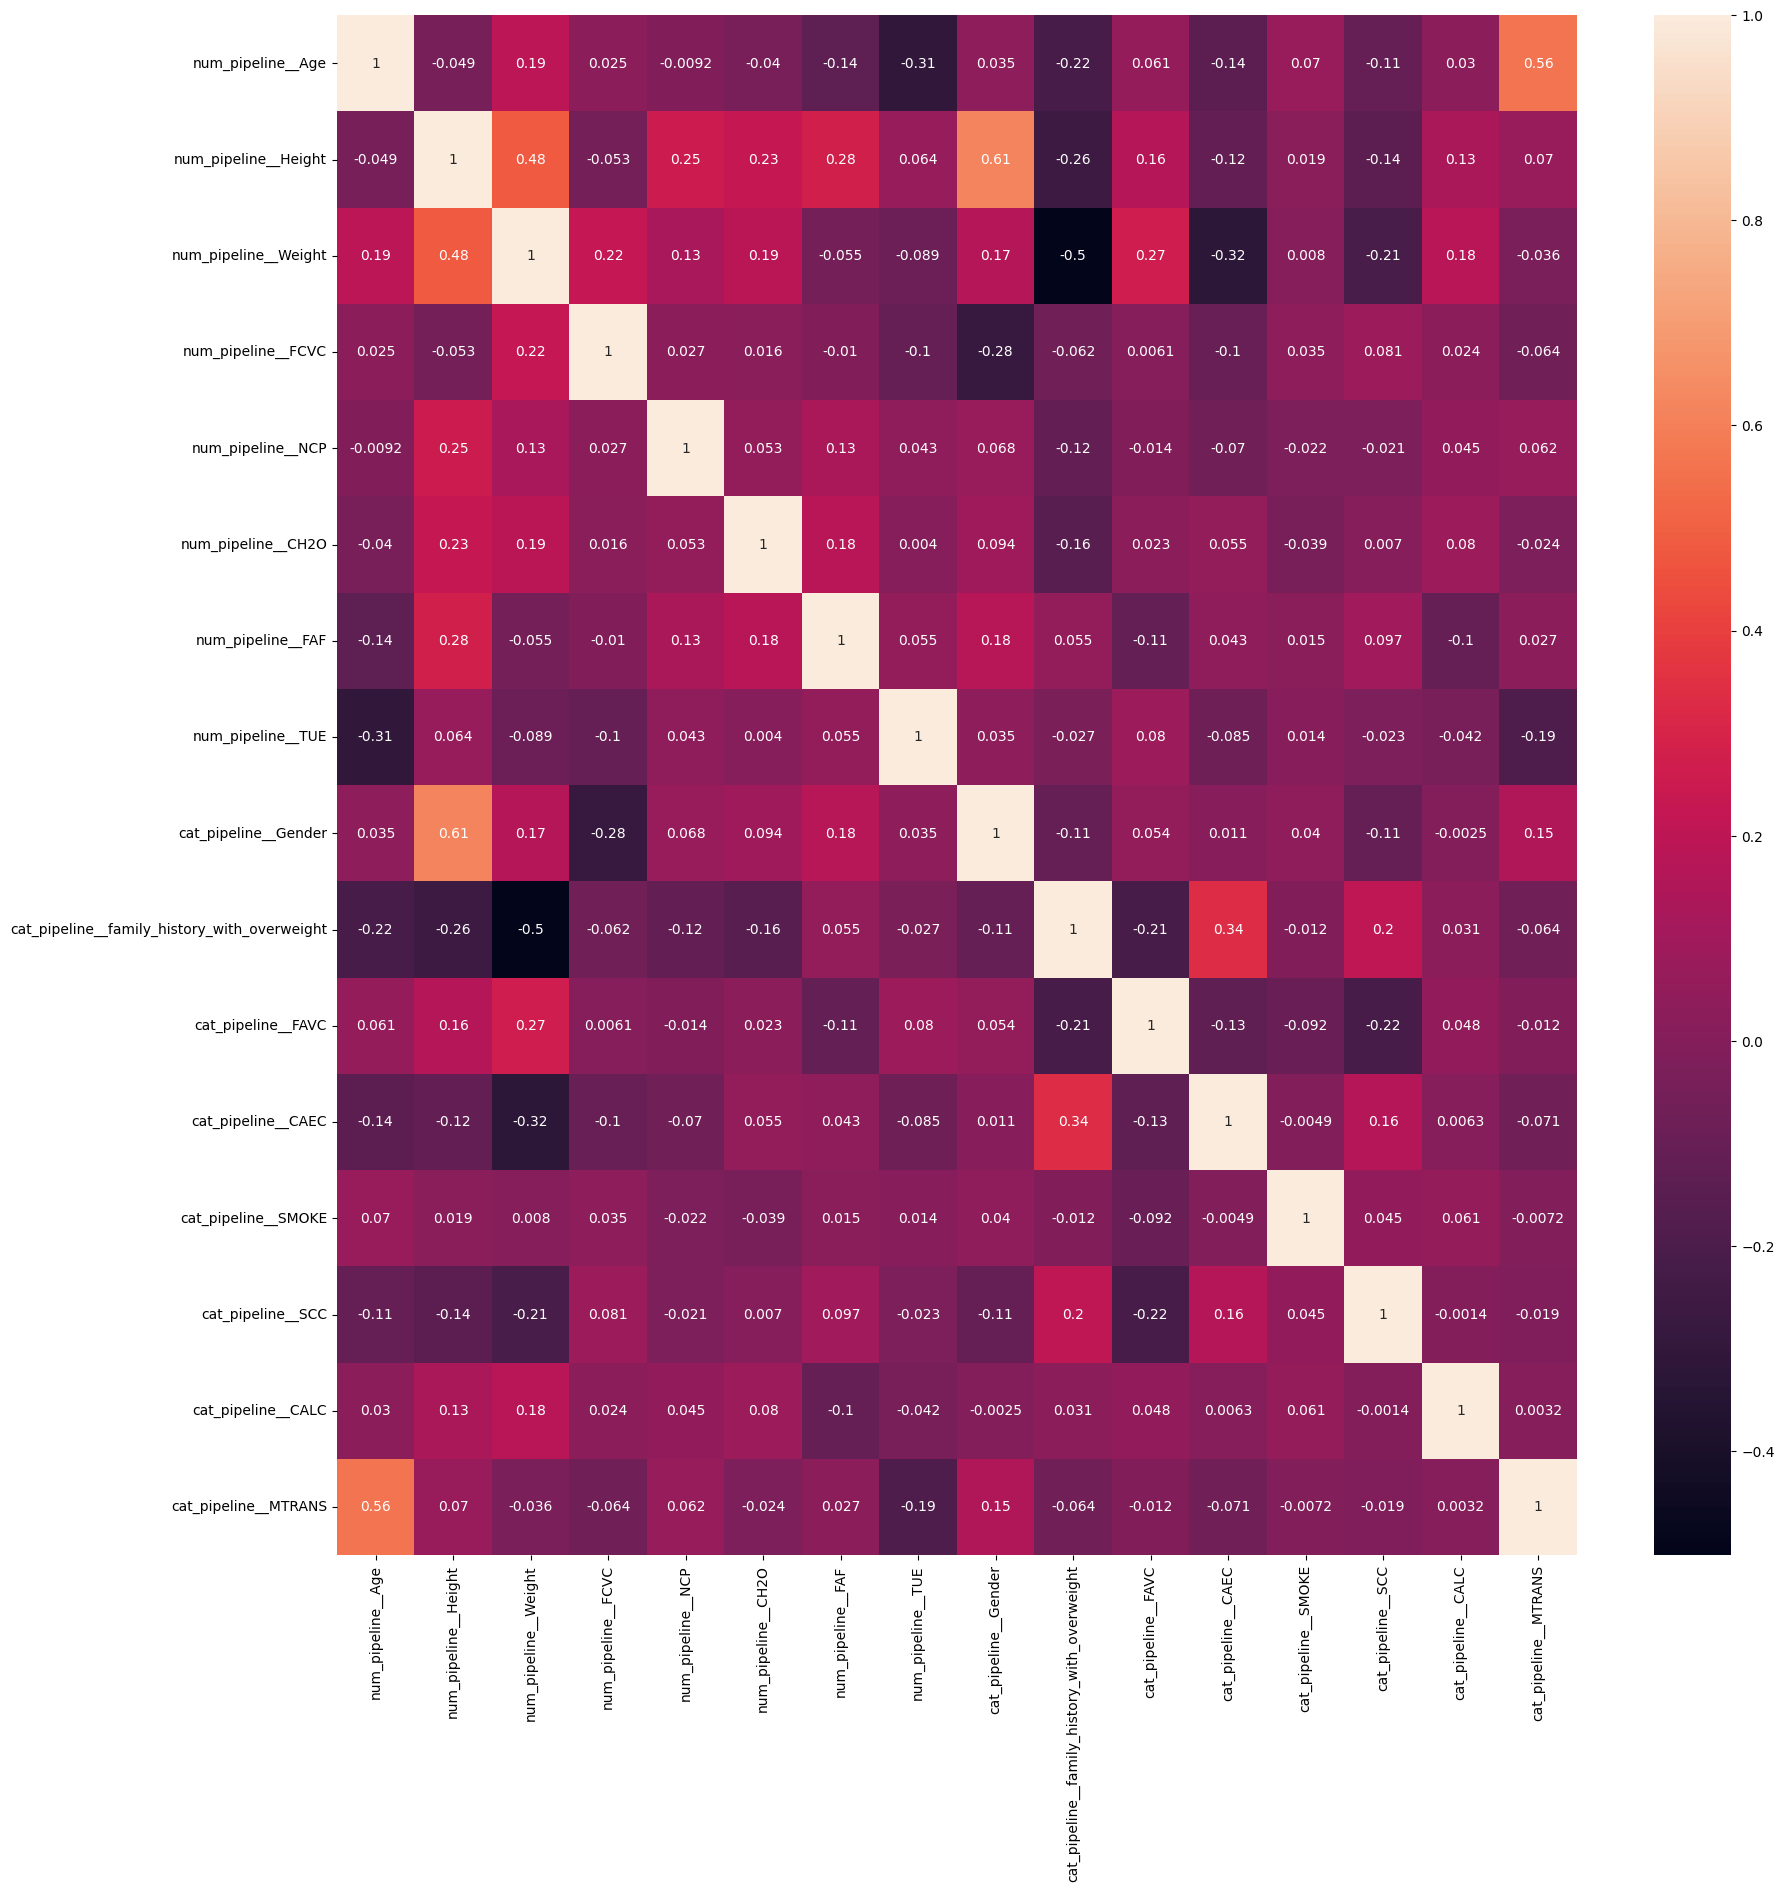

In [19]:
##correlation
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    a_score = accuracy_score(y_test,y_pred)
    return mae, rmse, a_score

In [29]:
## Train multiple models
models = {
          "Random Forest":RandomForestClassifier(),
          "Decision Tree":DecisionTreeClassifier(),
          "Logistic":LogisticRegression(),
          "SVM":SVC()
}    
trained_model_list=[]
model_list=[]
accuracy_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, a_score=evaluate_model(y_test,y_pred)
    

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("accuracy_score: ",a_score)
    print(classification_report(y_test, y_pred))
    

    accuracy_list.append(a_score)
    
    print('='*35)
    print('\n')

C:\Users\mohdalwaz\AppData\Local\Temp\ipykernel_4980\3032605820.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


Random Forest
Model Training Performance
RMSE: 0.5406548735632486
MAE: 0.11005917159763313
accuracy_score:  0.9431952662721893
              precision    recall  f1-score   support

           1       0.82      0.94      0.87       114
           2       0.91      0.88      0.90       109
           3       0.92      0.91      0.92       121
           4       0.99      0.96      0.97       143
           5       1.00      0.91      0.95       115
           6       0.96      0.99      0.98       108
           7       1.00      1.00      1.00       135

    accuracy                           0.94       845
   macro avg       0.94      0.94      0.94       845
weighted avg       0.95      0.94      0.94       845



Decision Tree
Model Training Performance
RMSE: 0.6124932073044426
MAE: 0.13846153846153847
accuracy_score:  0.9266272189349113
              precision    recall  f1-score   support

           1       0.88      0.82      0.85       114
           2       0.86      0.92     

c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

<AxesSubplot: >

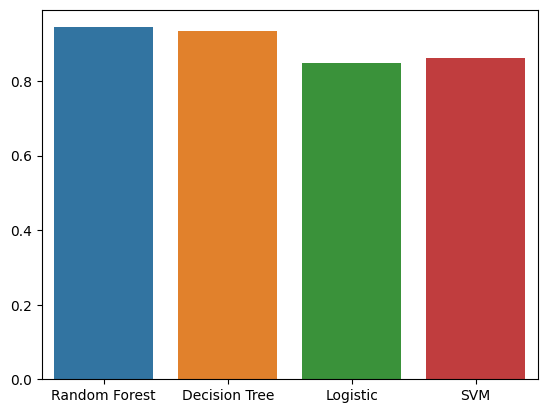

In [27]:
sns.barplot(x=model_list,y=accuracy_list)

Random Forest algorithm give more accurate result